<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
# COMPSCI 371 Homework 5

Partners: Brian Janger, Matthew Wang, Caleb Watson

### Problem 0 (3 points)

## Part 1: Convex Functions 

### Problem 1.1 (Exam Style)

To prove weakly convex, we will prove the equality $\phi(ux+(1-u)x') = u\phi(x) + (1-u)\phi(x')$, as if the two sides are equal, the function $\phi(x)$ must be weakly (but not strongly) convex.

Expanding on the left side, we get 

$b + w^T(ux+(1-u)x')$

$b + uw^Tx + (1-u)w^Tx'$

Expanding the equality on the right side, we get

$u(b+w^Tx) + (1-u)(b+w^Tx')$

$ub + uw^Tx + b - ub + (1-u)w^Tx'$

$b + uw^Tx + (1-u)w^Tx'$

Observe that after expansion, left side and right side are equal. Therefore, $\phi(x)$ is weakly convex from our proved equality above. 

### Problem 1.2 (Exam Style)

The function is not strongly convex, but it is weakly concave.

### Problem 1.3 (Exam Style)

Let $f(x) = x^2$ and $g(y) = -y$. $g(y) = -y$ still works because we removed the nondecreasing requirement, but it is still weakly convex. 

Therefore, $h(x) = g(f(x)) = -x^2$, which is clearly not convex (geometrically, this function looks like an upside-down bowl, and since we know that $y=x^2$ is convex, then $-y$ must be concave).

### Problem 1.4 (Exam Style)

We know that $h(x)=g(y)=g(f(x))$, $g(x)$ is weakly convex and nondecreasing, and $f(x)$ is weakly convex.

Let $u=f(\alpha x + (1-\alpha)x')$ and $v=\alpha y + (1 - \alpha) y'$ where $y=f(x)$ and $y'=f(x')$.

Because $f$ is weakly convex, we know that $u \leq v$ (derived from definitions above and the weakly convex inequality in notes).

We then plug $u$ and $v$ into function $g$. We know that $g$ is nondecreasing, so since $u \leq v$, then $g(u) \leq g(v)$.

Substitute $u$ and $v$, we get 

$g(f(\alpha x + (1 - \alpha) x')) \leq g(\alpha f(x) + (1-\alpha)f(x'))$

Using the definition of convexity on the right side of the inequality for $g(x)$ (which we know is convex by definition): 

$g(f(\alpha x + (1 - \alpha)x')) \leq g(\alpha f(x) + (1-\alpha)f(x')) \leq \alpha g(f(x)) + (1-\alpha)g(f(x'))$

and thus (by removing the middle part of the inequalities):

$g(f(\alpha x + (1 - \alpha)x')) \leq \alpha g(f(x)) + (1-\alpha)g(f(x'))$

Lastly, we substitute $g(f(x))$ with $h$, using the defined composition of functions:

$h(\alpha x + (a-\alpha)x') \leq \alpha h(x) + (1-\alpha)h(x')$

The above inequality proves that $h$ is weakly convex, as it matches the definition of weak convexity defined in the notes.

## Part 2: Score and Loss Functions 

### Problem 2.1 (Exam Style)

$f_1(\alpha) = \alpha: f_1$ is both weakly concave and weakly convex and increasing  

$f_2(\alpha) = \frac{1}{1+e^{-\alpha}}: f_2$ is neither concave nor convex and increasing  

$\ell_1(y,p) = (y-p)^2: \ell_1$ for both $y = 0$ and $1$ is strongly convex and neither increasing nor decreasing

$\ell_2(y,p) = -y\log{p} - (1-y)\log(1-p): \ell_2$ for both $y = 0$ and $1$ is strongly convex, but decreasing for $y=1$ and increasing for $y=0$

### Problem 2.2 (Exam Style)

$\ell_1(y,f_1(\alpha)) = (y-\alpha)^2$: for both $y = 0$ and $1$ the loss function is strongly convex and neither increasing nor decreasing 

$\ell_1(y,f_2(\alpha)) = (y-\frac{1}{1+e^{-\alpha}})^2$: for both $y = 0$ and $1$ the loss function is neither concave nor convex, but increasing for $y = 0$ and decreasing for $y = 1$

$\ell_2(y,f_1(\alpha))$ = undefined: these functions cannot be combined by composition as there exists no solution to $\log(\alpha)$ when $\alpha$ is negative

$\ell_2(y,f_2(\alpha)) = -y\log{\frac{1}{1+e^{-\alpha}}}-(1-y)\log(1-\frac{1}{1+e^{-\alpha}})$: for both $y = 0$ and $1$ the loss function is strongly convex, but increasing for $y = 0$ and decreasing for $y = 1$

### Problem 2.3

In [1]:
import numpy as np
from matplotlib import pyplot as plt
alpha_space = np.linspace(-5,5)

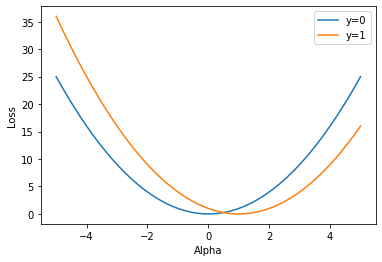

In [2]:
# plotting l_1(y, f_1(alpha))
def l(y, p):
    return (y - p) ** 2
zero_space = [l(0,a) for a in alpha_space]
one_space = [l(1,a) for a in alpha_space]

plt.plot(alpha_space, zero_space, label='y=0')
plt.plot(alpha_space, one_space, label='y=1')
plt.xlabel('Alpha')
plt.ylabel('Loss')
plt.legend()

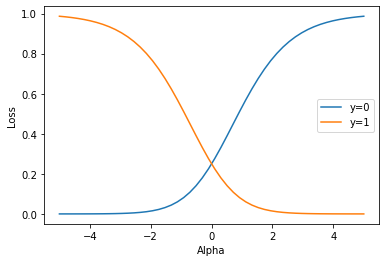

In [3]:
# plotting l_1(y, f_2(alpha))
def l(y, p):
    return (y - (1/(1+np.exp(-p)))) ** 2
zero_space = [l(0,a) for a in alpha_space]
one_space = [l(1,a) for a in alpha_space]

plt.plot(alpha_space, zero_space, label='y=0')
plt.plot(alpha_space, one_space, label='y=1')
plt.xlabel('Alpha')
plt.ylabel('Loss')
plt.legend()

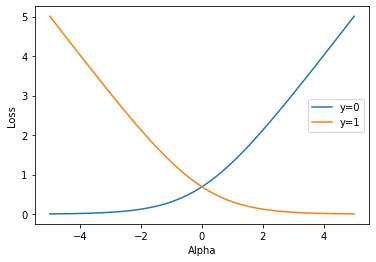

In [4]:
# plotting l_2(y, f_2(alpha))
def l(y, p):
    alpha = 1/(1+np.exp(-p))
    return -y*np.log(alpha) - (1-y)*np.log(1-alpha)
zero_space = [l(0,a) for a in alpha_space]
one_space = [l(1,a) for a in alpha_space]

plt.plot(alpha_space, zero_space, label='y=0')
plt.plot(alpha_space, one_space, label='y=1')
plt.xlabel('Alpha')
plt.ylabel('Loss')
plt.legend()

### Problem 2.4 (Exam Style)

When assessing how the above functions behave asymptotically as $\alpha$ approaches infinity for $y = 0$, we can simplify the above expressions to the following: 

$\ell_1(y,f_1(\alpha)) = (-\alpha)^2$ most sensitive

$\ell_1(y,f_2(\alpha)) = (-\frac{1}{1+e^{-\alpha}})^2$ least sensitive

$\ell_2(y,f_2(\alpha)) = \log(1-\frac{1}{1+e^{-\alpha}})$

As $\alpha \rightarrow \infty$, the expression $e^{-\alpha}$ approaches zero, thus allowing the above expressions to be simplified further and approximated by $\alpha^k$.

$\ell_1(y,f_1(\alpha)) = (-\alpha)^2 \rightarrow \alpha^2$

$\ell_1(y,f_2(\alpha)) = 1 \rightarrow \alpha^0$

$\ell_2(y,f_2(\alpha))$ = $\log(0) \rightarrow \alpha^1$

Of the above functions, $\ell_1(y,f_2(\alpha))$ is the least sensitive and $\ell_1(y,f_1(\alpha))$ is the most sensitive. 

### Problem 2.5 (Exam Style)

The function $\ell_1(y,f_1(\alpha))$ is sensitive to samples regardless of whether they are correctly or incorrectly classified because any pertubation from $\alpha = 0$ results in a change of $\alpha^2$ when $y = 0$. This remains the case as $\alpha$ approaches the boundaries of the pre-defined domain, which is the case in which the sample was incorrectly classified. When $\alpha$ is perturbed slightly from zero, in the case of correct classification, the same result is observed. 

## Part 3: The Multiclass Logistic-Regression Classifier

In [5]:
from urllib.request import urlretrieve
from os import path as osp


def retrieve(file_name, semester='fall22', course='371', homework=5):
    if osp.exists(file_name):
        print('Using previously downloaded file {}'.format(file_name))
    else:
        fmt = 'https://www2.cs.duke.edu/courses/{}/compsci{}/homework/{}/{}'
        url = fmt.format(semester, course, homework, file_name)
        urlretrieve(url, file_name)
        print('Downloaded file {}'.format(file_name))

In [6]:
retrieve('vowel.train')
retrieve('vowel.test')
retrieve('vowels.py')

Using previously downloaded file vowel.train
Using previously downloaded file vowel.test
Using previously downloaded file vowels.py


In [7]:
from vowels import vowel_dataset
import numpy as np

dataset = vowel_dataset()

### Problem 3.1

In [8]:
from sklearn.linear_model import LogisticRegression
np.set_printoptions(precision=2, suppress=True)

def train_and_test(data, split='original'):
    h = LogisticRegression(multi_class='multinomial')
    h.fit(data['train']['x'], data['train']['y'])
    score_train = h.score(data['train']['x'], data['train']['y'])
    
    h.predict(data['test']['x']) # don't think is needed
    score_test = h.score(data['test']['x'], data['test']['y'])

    print('training accuracy on the original split is {:.2f} percent'.format(100*score_train))
    print('testing accuracy on the original split is {:.2f} percent'.format(100*score_test))

    # return trained classifier
    return h
    
classifier = train_and_test(dataset, 'original')

training accuracy on the original split is 72.73 percent
testing accuracy on the original split is 45.02 percent


### Problem 3.2 (Exam Style)

The classifier does not generalize well. We can see that our multiple logistic regression classifier (which is very simple) only achieves an accuracy of \~73% on the data we are fitting to, and it predicts with even worse accuracy (\~45%) on the previously unseen test data.

This isn't an accurate classifier at all in the grand scheme of things, as we can't even expect our prediction to be correct half of the time on previously unseen data. Thus, the classifier doesn't generalize well.

### Problem 3.3

In [9]:
def print_difficult_vowels(h, data):
    min_train = 1
    min_test = 1
    # determine accuracy in training set
    for x in range(0,11):
        idx = np.argwhere(data['train']['y'] == x)
        sp_vowel_x = np.array([data['train']['x'][idx[i][0]].tolist() for i in range(idx.size)])
        sp_vowel_y = [x for i in range(len(sp_vowel_x))]
        score_train = h.score(sp_vowel_x, sp_vowel_y)
        if score_train < min_train:
            min_train = score_train
            min_train_vowel = data['label meaning'][x]
    # determine accuracy in testing set
    for x in range(0,11):
        idx = np.argwhere(data['test']['y'] == x)
        sp_vowel_x = np.array([data['test']['x'][idx[i][0]].tolist() for i in range(idx.size)])
        sp_vowel_y = [x for i in range(len(sp_vowel_x))]
        score_test = h.score(sp_vowel_x, sp_vowel_y)
        if score_test < min_test:
            min_test = score_test
            min_test_vowel = data['label meaning'][x]
    
    print('lowest training accuracy is {:.2f} percent on the vowel in \"{}\"'.format(min_train*100, min_train_vowel))
    print('lowest testing accuracy is {:.2f} percent on the vowel in \"{}\"'.format(min_test*100, min_test_vowel))
    
print_difficult_vowels(classifier, dataset)

lowest training accuracy is 47.92 percent on the vowel in "hud"
lowest testing accuracy is 16.67 percent on the vowel in "hod"


### Problem 3.4

In [17]:
def random_split(data):
    # merging training and test data
    data_updated = {'train' : {'x':[],'y':[]}, 'test':{'x':[],'y':[]},'label meaning':data['label meaning']}
    x_combine = np.concatenate([data['train']['x'], data['test']['x']])
    y_combine = np.concatenate([data['train']['y'], data['test']['y']])
    
    shuffled_indices = np.arange(x_combine.shape[0])
    np.random.shuffle(shuffled_indices)
    training_indices = shuffled_indices[:x_combine.shape[0]//2]
    testing_indices = shuffled_indices[x_combine.shape[0]//2:]
    
    data_updated['train']['x'] = x_combine[training_indices]
    data_updated['test']['x'] = x_combine[testing_indices]
    data_updated['train']['y'] = y_combine[training_indices]
    data_updated['test']['y'] = y_combine[testing_indices]
    
    return data_updated

random_data = random_split(dataset)
train_and_test(random_data)

training accuracy on the original split is 70.71 percent
testing accuracy on the original split is 63.84 percent


LogisticRegression(multi_class='multinomial')

### Problem 3.5 (Exam Style)

We can see that the training accuracy is fairly constant throughout the two different training/testing sets. This makes sense because when we are making our multiclass logistic regression model, it is essentially a fitting problem. Since the two different training sets are of (about) equal size, our model will be able to fit to the data in the two training sets with about equal accuracy (keeping in mind there will be some variability in our accuracy on the training set when we randomly split the data).

The testing accuracy is noticeably higher when we randomly split the data versus when we used the given training and testing datasets. This is likely because in problem 3.1, the two datasets are very different from one another (8 speakers for the training set, and 7 *different* speakers for the testing set), so the model we fit for the training set likely won't predict the testing set very well. But in problem 3.4, when we randomly split all of the data into training and testing, the two sets are going to be more alike each other, since they will (likely) contain data for all 15 speakers in each set. Therefore, our fitted model on the training data will be more effective at predicting the unseen testing data since the sets are going to be more alike each other.

The promising results we read about in machine learning literature can sometimes be misleading because problems 3.1 and 3.4 showed us that the effectiveness of our machine learning model on a testing set is heavily dependent on the way we partition our data into training and testing sets. Sometimes, it's not a guarantee that the unseen data we look at will be similar to the training data we fit on (a real-world example could be handwritten number recognition, where a person's previously unseen handwriting could be very different from anything we've seen and fitted on in the training set), so even if our results for our machine learning model are promising, they may not necessarily be accurate.